In [1]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Import your dataset and utility functions
import splitting.dataset as dataset
import utils

# Set the same parameters as your training script
BATCH_SIZE = 12
SPLIT_INDEX = 1
NORMALIZE = True
AUGMENTATION = 4

# Define Transformations
flipHorVer = dataset.RandomFlip()
flipLR = dataset.RandomFlipLeftRight()
rot90 = dataset.RandomRot90()
scale = dataset.RandomScale()
noise = dataset.RandomNoise()

if AUGMENTATION == 0:
    transform = None
elif AUGMENTATION == 1:
    transform = transforms.Compose([flipHorVer])
elif AUGMENTATION == 2:
    transform = transforms.Compose([rot90])
elif AUGMENTATION == 3:
    transform = transforms.Compose([flipLR])
elif AUGMENTATION == 12:
    transform = transforms.Compose([flipHorVer, rot90])
elif AUGMENTATION == 4:
    transform = transforms.Compose([scale])
elif AUGMENTATION == 5:
    transform = transforms.Compose([noise])
elif AUGMENTATION == 14:
    transform = transforms.Compose([flipHorVer, scale])
elif AUGMENTATION == 34:
    transform = transforms.Compose([flipLR, scale])
elif AUGMENTATION == 45:
    transform = transforms.Compose([scale, noise])

# Load dataset
train_dset, trainval_dset, val_dset, _, balance_weight_neg_pos = dataset.get_datasets_singleview(
    transform, NORMALIZE, False, SPLIT_INDEX)

train_loader = torch.utils.data.DataLoader(train_dset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)

# Print dataset info
print(f"Training set size: {len(train_dset.df)}")
print(f"Validation set size: {len(val_dset.df)}")
print(f"Class balance: No Tumor={balance_weight_neg_pos[0]}, Tumor={balance_weight_neg_pos[1]}")


Training set size: 2114
Validation set size: 512
Class balance: No Tumor=0.2078651685393258, Tumor=0.7921348314606742


Image batch shape: torch.Size([12, 1, 310, 310])


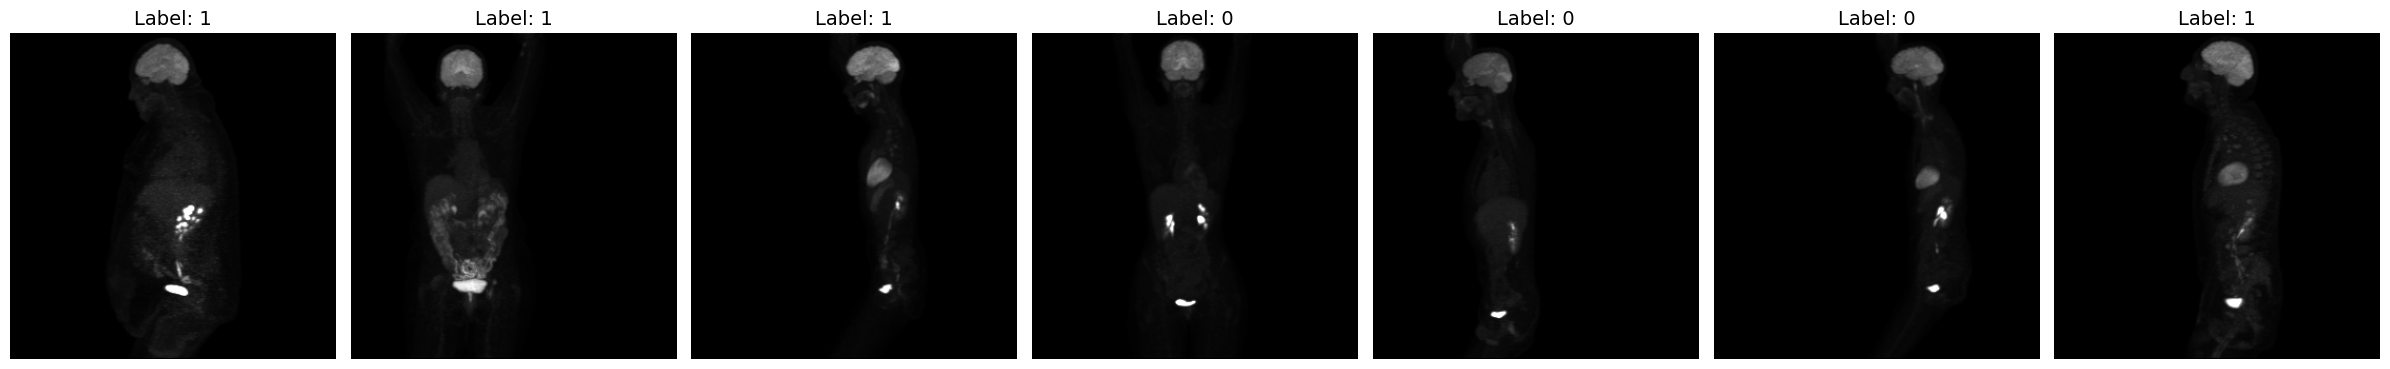

Image shape: (310, 310)
Mean pixel value: -0.019
Standard deviation: 1.030


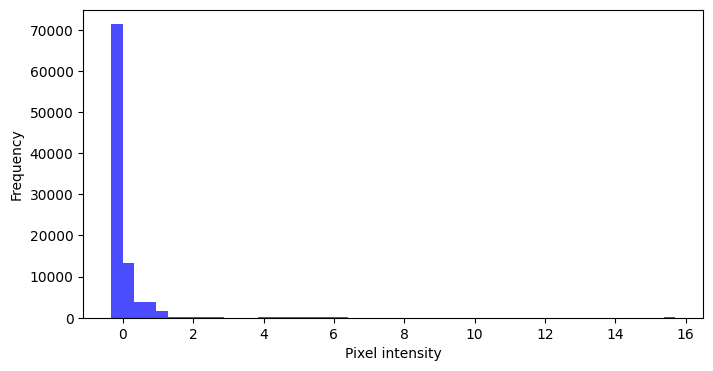

Image shape: (310, 310)
Mean pixel value: -0.019
Standard deviation: 0.837


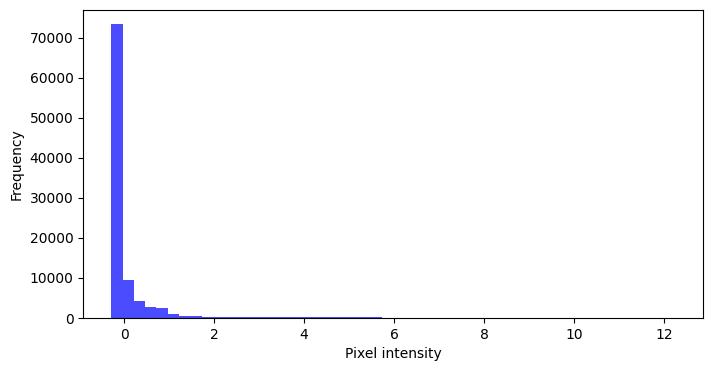

Image shape: (310, 310)
Mean pixel value: 0.153
Standard deviation: 1.327


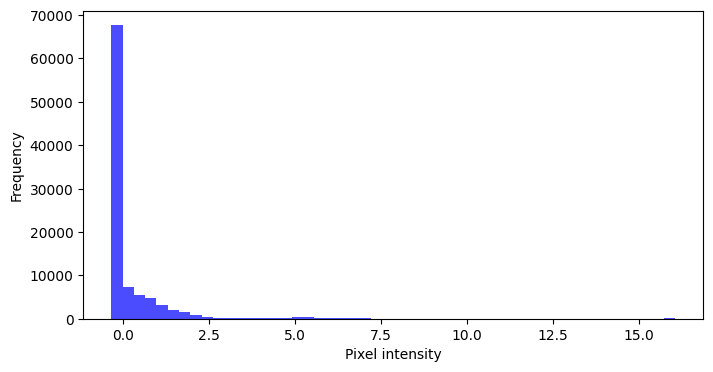

Image shape: (310, 310)
Mean pixel value: -0.061
Standard deviation: 0.963


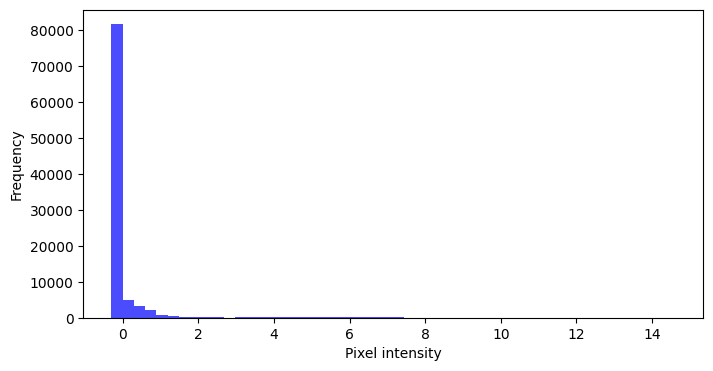

Image shape: (310, 310)
Mean pixel value: 0.038
Standard deviation: 0.882


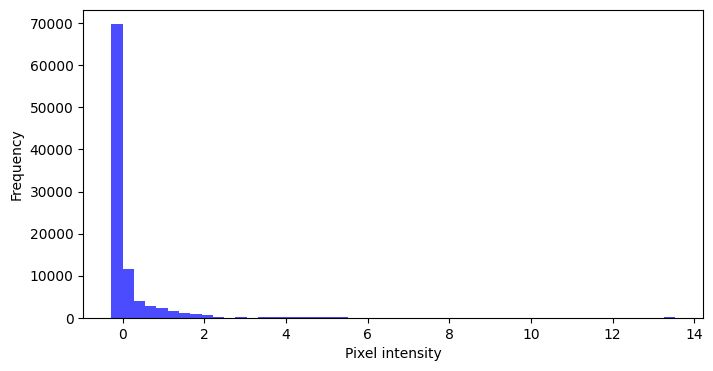

In [2]:
def visualize_batch(loader):
    """Visualizes one batch of images from the DataLoader and inspects detailed statistics for random images."""
    dataiter = iter(loader)
    batch = next(dataiter)
    

    images, labels = batch

    print(f"Image batch shape: {images.shape}")  # Expected: (batch_size, channels, height, width)
    
    # Convert tensor to NumPy format (assuming images are in CxHxW format)
    images_np = images.cpu().numpy().transpose((0, 2, 3, 1))  # Now (batch, height, width, channels)
    
    # Plot a row of images with labels and scan ids.
    num_to_show = min(len(images_np), 7)
    fig, axes = plt.subplots(1, num_to_show, figsize=(24, 12))
    if num_to_show == 1:
        axes = [axes]  # Ensure axes is iterable.
        
    for i in range(num_to_show):
        # Extract label as a scalar
        if isinstance(labels, torch.Tensor):
            if labels.dim() > 1:
                label_val = labels[i, 0].item()  # For example, if labels is (batch_size, 1)
            else:
                label_val = labels[i].item()
        else:
            label_val = labels[i]
        
        title_str = f"Label: {label_val}"
        # If the image is grayscale (channel=1), squeeze the channel.
        img_to_show = images_np[i].squeeze() if images_np[i].shape[-1] == 1 else images_np[i]
        axes[i].imshow(img_to_show, cmap="gray" if img_to_show.ndim == 2 else None)
        axes[i].axis("off")
        axes[i].set_title(title_str, fontsize=14)

    
    plt.tight_layout()
    plt.show()
    
    # For detailed inspection, randomly select one or two images from the batch.
    num_details = min(5, len(images_np))
    indices = np.random.choice(len(images_np), size=num_details, replace=False)
    
    for idx in indices:
        img = images_np[idx]
        # Squeeze channel if it's 1-channel.
        if img.shape[-1] == 1:
            img = img.squeeze(-1)
        img_mean = np.mean(img)
        img_std = np.std(img)
        img_shape = img.shape
        
    
        print(f"Image shape: {img_shape}")
        print(f"Mean pixel value: {img_mean:.3f}")
        print(f"Standard deviation: {img_std:.3f}")
        
        # Plot the histogram of pixel intensities.
        plt.figure(figsize=(8, 4))
        plt.hist(img.ravel(), bins=50, color='blue', alpha=0.7)
       
        plt.xlabel("Pixel intensity")
        plt.ylabel("Frequency")
        plt.show()

# Call the function to visualize images and inspect detailed statistics.
visualize_batch(train_loader)

Training set size: 2006
Validation set size: 550
Class balance: No Tumor=0.2032828282828283, Tumor=0.7967171717171717


Image batch shape: torch.Size([12, 1, 310, 310])


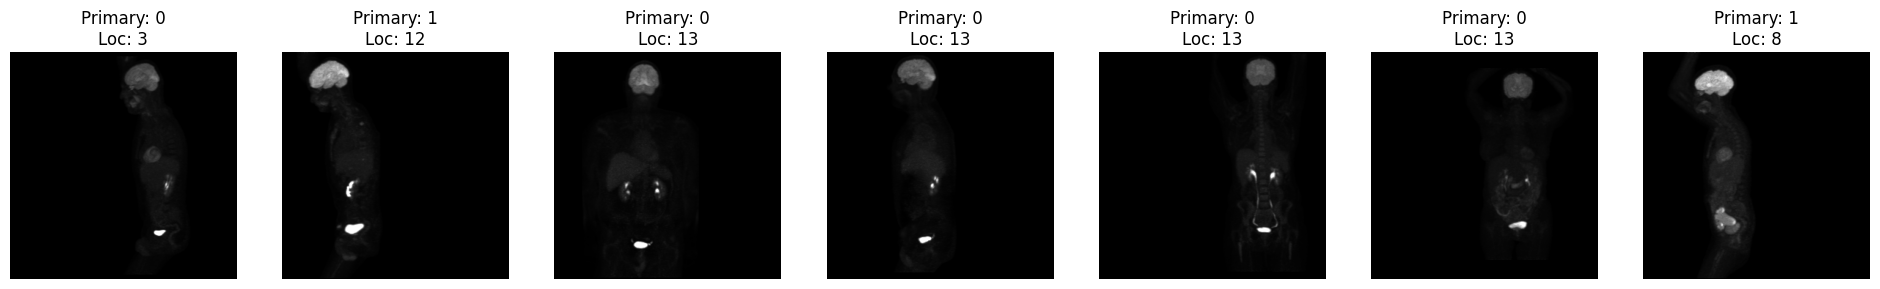

In [3]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Import the new dataset module that returns both targets.
import splitting.dataset_loca as dataset
import utils

# For augmentations, we import them from the original dataset module.
from splitting.dataset import RandomFlip, RandomFlipLeftRight, RandomRot90, RandomScale, RandomNoise

# Set parameters.
BATCH_SIZE = 12
SPLIT_INDEX = 1
NORMALIZE = True
AUGMENTATION = 4

# Define transformations.
flipHorVer = RandomFlip()
flipLR = RandomFlipLeftRight()
rot90 = RandomRot90()
scale = RandomScale()
noise = RandomNoise()

if AUGMENTATION == 0:
    transform = None
elif AUGMENTATION == 1:
    transform = transforms.Compose([flipHorVer])
elif AUGMENTATION == 2:
    transform = transforms.Compose([rot90])
elif AUGMENTATION == 3:
    transform = transforms.Compose([flipLR])
elif AUGMENTATION == 12:
    transform = transforms.Compose([flipHorVer, rot90])
elif AUGMENTATION == 4:
    transform = transforms.Compose([scale])
elif AUGMENTATION == 5:
    transform = transforms.Compose([noise])
elif AUGMENTATION == 14:
    transform = transforms.Compose([flipHorVer, scale])
elif AUGMENTATION == 34:
    transform = transforms.Compose([flipLR, scale])
elif AUGMENTATION == 45:
    transform = transforms.Compose([scale, noise])

# Load dataset using the new helper function that returns both targets.
train_dset, trainval_dset, val_dset, _, balance_weight_neg_pos = dataset.get_datasets_singleview_withLoca(
    transform, NORMALIZE, False, SPLIT_INDEX)

train_loader = torch.utils.data.DataLoader(train_dset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)

# Print dataset info.
print(f"Training set size: {len(train_dset.df)}")
print(f"Validation set size: {len(val_dset.df)}")
print(f"Class balance: No Tumor={balance_weight_neg_pos[0]}, Tumor={balance_weight_neg_pos[1]}")

def visualize_batch(loader):
    """Visualizes one batch of images and displays both the primary and localization targets."""
    dataiter = iter(loader)
    images, targets = next(dataiter)
    # Unpack targets: expect a tuple (primary_target, localization_target)
    primary_targets, loc_targets = targets
    print(f"Image batch shape: {images.shape}")  # Expected: (batch_size, channels, height, width)
    
    # Convert tensor to NumPy array and transpose from (B,C,H,W) to (B,H,W,C).
    images = images.numpy().transpose((0, 2, 3, 1))
    
    # If images are grayscale (channel == 1), squeeze the channel dimension.
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    
    num_imgs = min(len(images), 7)
    fig, axes = plt.subplots(1, num_imgs, figsize=(24, 12))
    if num_imgs == 1:
        axes = [axes]  # Ensure axes is iterable.
    
    for i in range(num_imgs):
        axes[i].imshow(images[i], cmap="gray")
        axes[i].axis("off")
        # Display both targets in the title.
        axes[i].set_title(f"Primary: {primary_targets[i].item()}\nLoc: {loc_targets[i].item()}")
    
    plt.show()

# Call the function to visualize a batch from the training loader.
visualize_batch(train_loader)


In [4]:
# %% Notebook cell: Check dataset splits and DataLoader ordering

import pandas as pd
import numpy as np
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

# Import the dataset helper from your project.
# (Adjust the import path if necessary.)
from splitting.dataset import get_datasets_singleview

# Set parameters
transform = None         # No augmentation for inspection
normalize = True         # Use normalized data (as in your training)
balance = False          # Not using balancing for this check
split_index = 5          # Choose one split (change if needed)

# Load the datasets (train, trainval, validation, test, plus balance weights)
train_dset, trainval_dset, val_dset, test_dset, balance_weight = get_datasets_singleview(
    transform, normalize, balance, split_index
)

# Print basic dataset sizes from the underlying DataFrame (stored as .df in your dataset instance)
print("Dataset sizes (as per underlying CSV):")
print("  Training set:", len(train_dset.df))
print("  Validation set:", len(val_dset.df))
print("  Test set:", len(test_dset.df))

# Check unique identifiers—here we assume the CSV uses 'study_id' as a unique identifier.
# You might use 'patient_id' or 'filename' if they are more appropriate.
train_ids = set(train_dset.df['study_id'].unique())
val_ids   = set(val_dset.df['study_id'].unique())
test_ids  = set(test_dset.df['study_id'].unique())

print("\nUnique study IDs per split:")
print("  Training:", len(train_ids))
print("  Validation:", len(val_ids))
print("  Test:", len(test_ids))

# Compute overlaps between splits
overlap_train_val = train_ids.intersection(val_ids)
overlap_train_test = train_ids.intersection(test_ids)
overlap_val_test   = val_ids.intersection(test_ids)

print("\nOverlap between splits:")
print("  Training and Validation overlap:", overlap_train_val)
print("  Training and Test overlap:", overlap_train_test)
print("  Validation and Test overlap:", overlap_val_test)

# -------------------------------
# Now, create DataLoaders (without shuffling) and inspect ordering.
# This simulates the order that will be used in prediction/training.
# -------------------------------
train_loader = DataLoader(train_dset, batch_size=32, shuffle=False)
val_loader   = DataLoader(val_dset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dset, batch_size=32, shuffle=False)

def print_first_batch(loader, set_name):
    print(f"\nFirst batch from {set_name} DataLoader:")
    batch_scan_ids = []  # try to collect a unique identifier for each sample in a batch
    # We assume that your dataset may have a 'scan_id' field. If not, you can print any identifier such as 'filename'
    # (One easy approach is to directly read train_dset.df if your __getitem__ doesn't return the id.)
    for i, (inputs, _) in enumerate(loader):
        # For demonstration, print the indices corresponding to this batch.
        start = i * loader.batch_size
        end = start + inputs.size(0)
        print(f"  Batch {i}: from sample index {start} to {end - 1}")
        # (If your dataset returns an identifier along with the input and target, you could print that as well.)
        break  # only inspect the first batch

print_first_batch(train_loader, "Training")
print_first_batch(val_loader, "Validation")
print_first_batch(test_loader, "Test")


Dataset sizes (as per underlying CSV):
  Training set: 2110
  Validation set: 516
  Test set: 578

Unique study IDs per split:
  Training: 1055
  Validation: 258
  Test: 289

Overlap between splits:
  Training and Validation overlap: set()
  Training and Test overlap: set()
  Validation and Test overlap: set()

First batch from Training DataLoader:
  Batch 0: from sample index 0 to 31

First batch from Validation DataLoader:
  Batch 0: from sample index 0 to 31

First batch from Test DataLoader:
  Batch 0: from sample index 0 to 31


In [1]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
import splitting.dataset as dataset
import utils
import numpy as np

# Parameters
split_index = 1
batch_size = 32
normalize = True

# Load dataset without shuffling
_, _, val_dset, _, _ = dataset.get_datasets_singleview(
    transform=None, norm=normalize, balance=False, split_index=split_index
)
val_loader = DataLoader(val_dset, batch_size=batch_size, shuffle=False, num_workers=4)

# Load a model (adjust if needed — this uses default architecture)
model = utils.get_model(cls_arch="simple", hidden_dim=256, dropout=0.3)
model.eval()

# Run the test and collect predictions + IDs
probs = []
ids_from_loader = []

with torch.no_grad():
    for inputs, _, ids in val_loader:
        inputs = inputs.cuda()
        output = model(inputs)
        p = F.softmax(output, dim=1)[:, 1].cpu().numpy()
        probs.extend(p)
        ids_from_loader.extend(ids)

# Get the IDs directly from the DataFrame
ids_from_df = list(val_dset.df['study_id'].values)

# Check match
match = ids_from_loader == ids_from_df
print("✅ Study IDs match with dataset order:", match)

# Optional debug: show mismatches if any
if not match:
    for i, (id_a, id_b) in enumerate(zip(ids_from_loader, ids_from_df)):
        if id_a != id_b:
            print(f"❌ Mismatch at index {i}: Loader ID={id_a}, DF ID={id_b}")


✅ Study IDs match with dataset order: True


In [1]:
import torch
from torch.utils.data import DataLoader
import splitting.dataset as dataset

# Parameters
split_index = 1
batch_size = 32
normalize = True

# Load datasets
train_dset, _, _, test_dset, _ = dataset.get_datasets_singleview(
    transform=None, norm=normalize, balance=False, split_index=split_index
)

# Prepare DataLoader (shuffle=True simulates training behavior)
train_loader = DataLoader(train_dset, batch_size=batch_size, shuffle=True, num_workers=4)

# Extract all test set study IDs
test_ids_set = set(test_dset.df['study_id'].values)

# Check batches for overlap
leak_found = False
overlapping_ids = []

for i, (_, _, batch_ids) in enumerate(train_loader):
    overlaps = test_ids_set.intersection(batch_ids)
    if overlaps:
        leak_found = True
        overlapping_ids.extend(overlaps)
        print(f"❌ Leakage detected in batch {i}: {list(overlaps)}")

if not leak_found:
    print("✅ No data leakage: no test study_id found in any training batch.")

# Optional: print all overlapping IDs
if overlapping_ids:
    print("\nSummary of all leaked study_ids:")
    for sid in sorted(set(overlapping_ids)):
        print("  -", sid)


✅ No data leakage: no test study_id found in any training batch.
